<a href="https://colab.research.google.com/github/BaneShand/feldman/blob/main/%D0%BB%D0%B0%D0%B1%D0%B02%D0%B2%D0%B0%D1%80%D0%B8%D0%B0%D0%BD%D1%827.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Подключение нужных для работы моделей
import pandas as pd     # для чтения и записи табличных файлов
import numpy as np      # для математической обработки данных
import matplotlib.pyplot as plt # для построения графиков

In [2]:
url = "https://drive.google.com/uc?export=download&id=10X7i5PYwSAe08JtXUKDBkfWUHTuI8NMm"

In [3]:
# вывод заголовка таблицы и первых пяти строк
input_df = pd.read_csv(url, sep = ';', index_col = False) #при указывании index_col = False индекс 0 строки в качестве заголовка остается. Не знаю как поправить
input_df.head()

,2200
0,7700
1,12100
2,17600
3,23100
4,28600


In [4]:
# Просмотр последних строк таблицы
input_df.tail()

,2200
60281,-23100
60282,-18700
60283,-14300
60284,-11000
60285,-5500


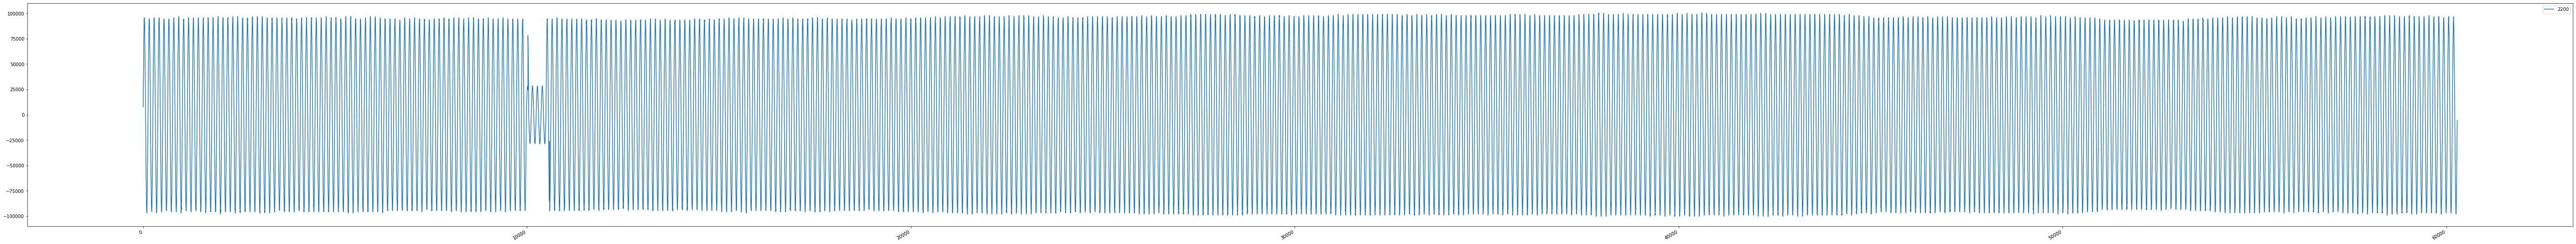

In [19]:
# График значений всей таблицы
axes = input_df.plot(marker=None, figsize=(100, 10), subplots = True)

from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()

matrix = input_df.values
matrix = matrix.flatten()
y = np.arange(0, 60286, 1)
p = figure(plot_width = 800, plot_height = 400)

p.line(y, matrix, line_width = 1, color = 'grey')



show(p)

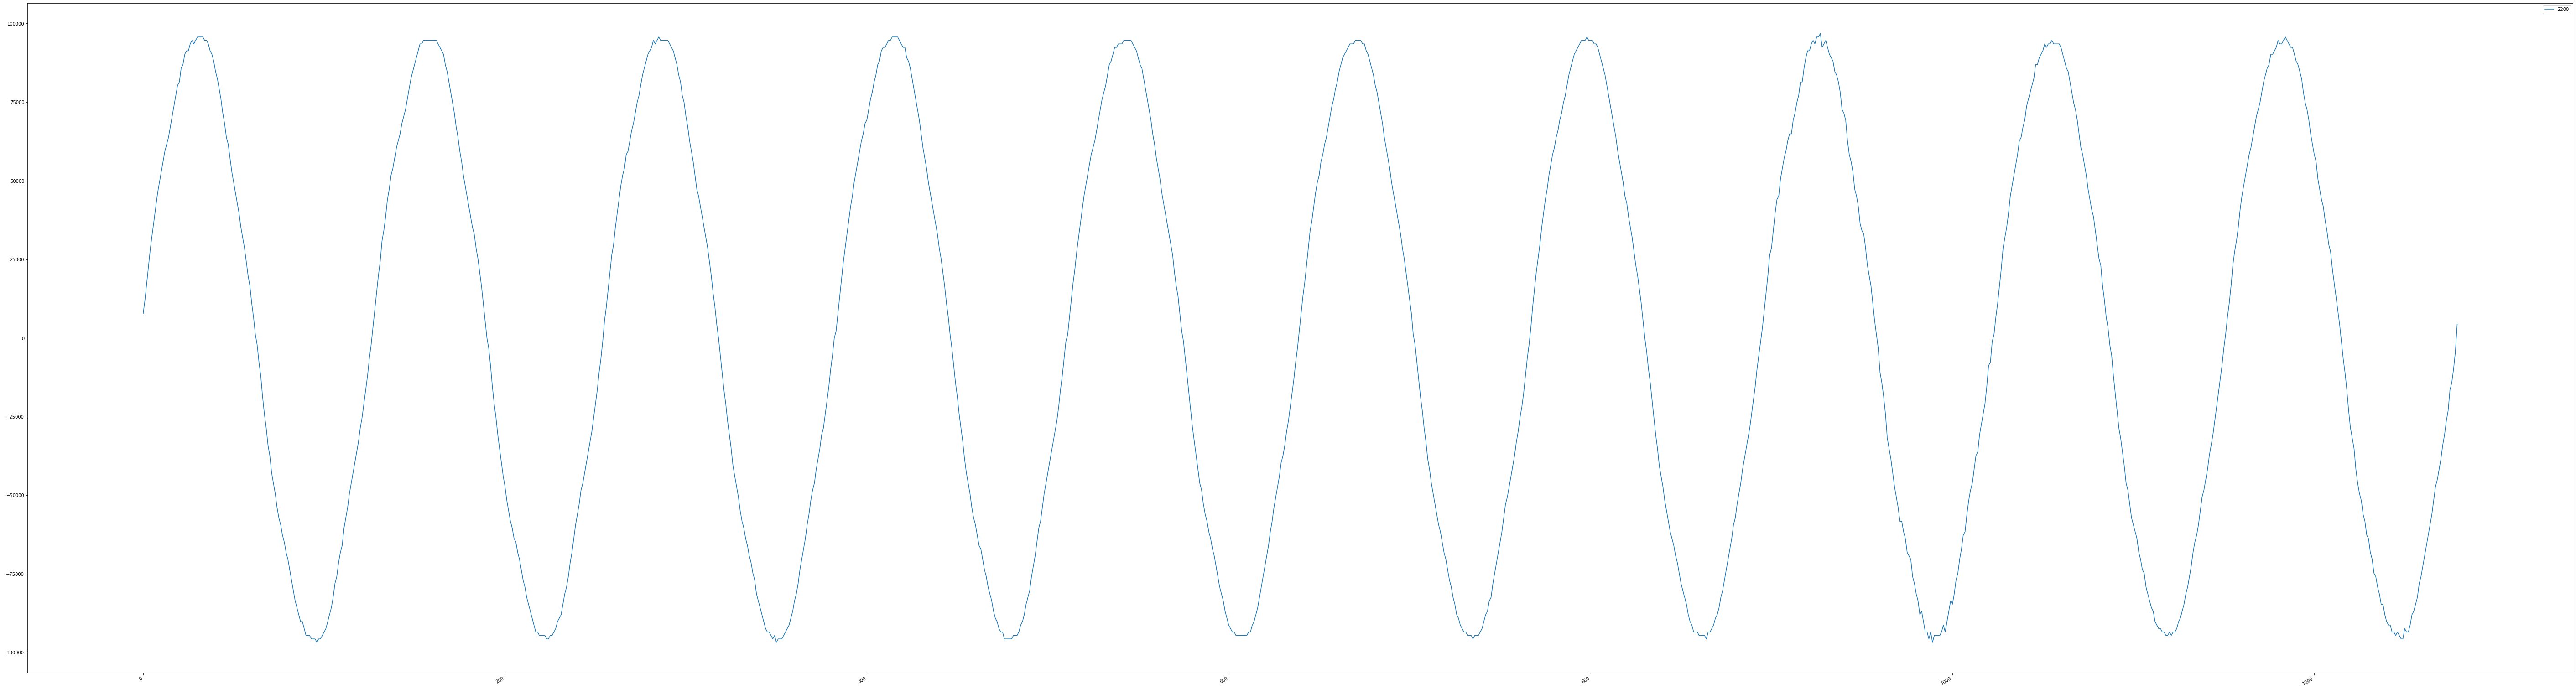

In [20]:
# График первый 1280 значений для наглядности (интерактивный - взятый по модулю и переведенный из мкА в А)
input_df1 = input_df.head(1280)
axes = input_df1.plot(marker=None, figsize=(100, 30), subplots = True)
x = np.arange(0, 1280, 1)

from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()
input_matrix5 = abs(input_df1.values)*10**-5
input_matrix5 = input_matrix5.flatten()
p = figure(plot_width = 800, plot_height = 400)

p.line(x, input_matrix5, line_width = 1, color = 'grey')



show(p)


In [7]:
#Взяты первые 1280 значений, подсчитано среднее значение силы тока на всем этом интервале. 
input_df2 = input_df.head(1280)
input_matrix = input_df2.values
input_matrix[: , 0].mean()


-182.1875

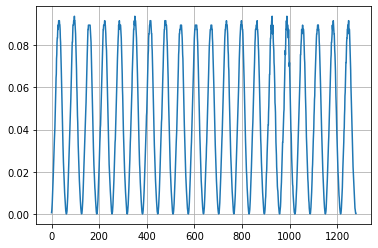

In [27]:
# Построен график значений мощности первых 1280 значений таблицы (P = I2R, R = 10 Ом).
a = []
x = np.arange(0, 1280, 1)

input_df3 = input_df.head(1280)
fig, ax = plt.subplots()
ax.plot(x, ((input_df3*10**-6)**2)*10) 
ax.grid(True)
plt.show()

input_matrix1 = input_df3.values
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

input_matrix1 = input_matrix1.flatten()

output_notebook()

p = figure(plot_width = 800, plot_height = 400)

p.line(x, ((input_matrix1*10**-6)**2)*10, line_width = 1, color = 'grey')

show(p)


# сохранение в текстовый csv файл или в Excel формат
data_frame = pd.DataFrame(((input_matrix1*10**-6)**2)*10)
data_frame.to_excel('power.xlsx', index = False, header = False)
data_frame.to_csv('power.csv', index = False, header = False)

# Мощность не выходит за пределы от 0 до бесконечности, значит график построен верно.

In [22]:
#Сравнить среднее значение мощности как среднеарифметическое значений графика мощности и как полученное по формуле P = I2R, где вместо I подставлено среднее значение модуля тока на рассматриваемом интервале.
#Значения будем сравнивать на интервале первых 1280 значений.
power = ((input_matrix1*10**-6)**2)*10
power.mean()

# полученное значение равно среднеарифметическому значению графика мощности на заданном интервале

0.04454261453124999

In [23]:
# найдем среднее значение модуля силы тока на данном интервале и подставим в формулу:
input_matrix2 = abs(input_matrix)
I = input_matrix2[: , 0].mean()
power1 = (I*10**-5)**2*10
print(power1)

3.621670012597656
